In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/gdrive')

pd.set_option('max_colwidth', 999)
pd.set_option('max_rows', 50)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
PATH = "/gdrive/MyDrive/MLDM/Data Mining/Project/data"


df_train = pd.read_pickle(PATH + "/DataFrame_train_preprocessing_V2.pkl")
df_test = pd.read_pickle(PATH + "/DataFrame_test_preprocessing_V2.pkl")

idx_val = np.load(PATH + "/array_idx_val.npy")
idx_train = np.load(PATH + "/array_idx_train.npy")

df_val = df_train.iloc[idx_val]
df_train = df_train.iloc[idx_train]

df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)


Y_val = np.float32(df_val['label'])
Y_train = np.float32(df_train['label'])



val_bool   = np.load(PATH + "/encodings/val_bool.npy")
train_bool = np.load(PATH + "/encodings/train_bool.npy")
test_bool  = np.load(PATH + "/encodings/test_bool.npy")

val_tf   = np.load(PATH + "/encodings/val_tf.npy")
train_tf = np.load(PATH + "/encodings/train_tf.npy")
test_tf  = np.load(PATH + "/encodings/test_tf.npy")

val_tfidf   = np.load(PATH + "/encodings/val_tfidf.npy")
train_tfidf = np.load(PATH + "/encodings/train_tfidf.npy")
test_tfidf  = np.load(PATH + "/encodings/test_tfidf.npy")

In [ ]:
dict_scores = {"f1_score_bool" : [],
               "accuracy_score_bool" : [],
               "roc_auc_score_bool" : [],

               "f1_score_tf" : [],
               "accuracy_score_tf" : [],
               "roc_auc_score_tf" : [],

               "f1_score_tfidf" : [],
               "accuracy_score_tfidf" : [],
               "roc_auc_score_tfidf" : []}


class_weight = {0:0.2, 1:0.8}


L_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

for dim in L_dims:
    print(dim)

    algo = KernelPCA(n_components=dim, kernel='linear')
    X_pca_bool_train = algo.fit_transform(train_bool)
    X_pca_bool_val = algo.transform(val_bool)

    # algo = LogisticRegression(random_state=123, max_iter=500, class_weight=class_weight)
    # algo = SGDClassifier(random_state=123, max_iter=2000, alpha=0.0001, class_weight=class_weight)
    # algo = KNeighborsClassifier(n_neighbors=5)
    algo = RandomForestClassifier(random_state=123, n_estimators=50, max_depth=50, class_weight=class_weight)
    # algo = SVC(random_state=123, kernel='rbf', class_weight=class_weight)

    algo.fit(X_pca_bool_train, Y_train)

    y_pred_bool = algo.predict(X_pca_bool_val)

    dict_scores["f1_score_bool"].append(f1_score(Y_val, y_pred_bool))
    dict_scores["accuracy_score_bool"].append(accuracy_score(Y_val, y_pred_bool))
    dict_scores["roc_auc_score_bool"].append(roc_auc_score(Y_val, y_pred_bool))

    print(dict_scores["f1_score_bool"][-1], dict_scores["accuracy_score_bool"][-1], dict_scores["roc_auc_score_bool"][-1])

    #=================================================================

    algo = KernelPCA(n_components=dim, kernel='linear')
    X_pca_tf_train = algo.fit_transform(train_tf)
    X_pca_tf_val = algo.transform(val_tf)

    # algo = LogisticRegression(random_state=123, max_iter=500, class_weight=class_weight)
    # algo = SGDClassifier(random_state=123, max_iter=2000, alpha=0.0001, class_weight=class_weight)
    # algo = KNeighborsClassifier(n_neighbors=5)
    algo = RandomForestClassifier(random_state=123, n_estimators=50, max_depth=50, class_weight=class_weight)
    # algo = SVC(random_state=123, kernel='rbf', class_weight=class_weight)

    algo.fit(X_pca_tf_train, Y_train)

    y_pred_tf = algo.predict(X_pca_tf_val)

    dict_scores["f1_score_tf"].append(f1_score(Y_val, y_pred_tf))
    dict_scores["accuracy_score_tf"].append(accuracy_score(Y_val, y_pred_tf))
    dict_scores["roc_auc_score_tf"].append(roc_auc_score(Y_val, y_pred_tf))

    print(dict_scores["f1_score_tf"][-1], dict_scores["accuracy_score_tf"][-1], dict_scores["roc_auc_score_tf"][-1])

    #=================================================================

    algo = KernelPCA(n_components=dim, kernel='linear')
    X_pca_tfidf_train = algo.fit_transform(train_tfidf)
    X_pca_tfidf_val = algo.transform(val_tfidf)

    # algo = LogisticRegression(random_state=123, max_iter=500, class_weight=class_weight)
    # algo = SGDClassifier(random_state=123, max_iter=2000, alpha=0.0001, class_weight=class_weight)
    # algo = KNeighborsClassifier(n_neighbors=5)
    algo = RandomForestClassifier(random_state=123, n_estimators=50, max_depth=50, class_weight=class_weight)
    # algo = SVC(random_state=123, kernel='rbf', class_weight=class_weight)

    algo.fit(X_pca_tfidf_train, Y_train)

    y_pred_tfidf = algo.predict(X_pca_tfidf_val)

    dict_scores["f1_score_tfidf"].append(f1_score(Y_val, y_pred_tfidf))
    dict_scores["accuracy_score_tfidf"].append(accuracy_score(Y_val, y_pred_tfidf))
    dict_scores["roc_auc_score_tfidf"].append(roc_auc_score(Y_val, y_pred_tfidf))

    print(dict_scores["f1_score_tfidf"][-1], dict_scores["accuracy_score_tfidf"][-1], dict_scores["roc_auc_score_tfidf"][-1])

2
0.8999999999999999 0.96 0.9187675070028012
0.8133333333333334 0.93 0.8524743230625584
0.8518518518518517 0.94 0.8931839402427638
4
0.8957055214723926 0.9575 0.9214752567693745
0.8187919463087248 0.9325 0.85406162464986
0.9047619047619048 0.96 0.9359477124183007
8
0.8765432098765432 0.95 0.9081232492997199
0.847682119205298 0.9425 0.873295985060691
0.8957055214723926 0.9575 0.9214752567693745
16
0.9012345679012346 0.96 0.9230625583566762
0.84 0.94 0.8674136321195145
0.927710843373494 0.97 0.9465919701213819
32
0.8846153846153846 0.955 0.9027077497665733
0.8299319727891156 0.9375 0.8572362278244632
0.9135802469135802 0.965 0.9305322128851542
64
0.8701298701298701 0.95 0.8909430438842203
0.8533333333333333 0.945 0.8748832866479925
0.8987341772151899 0.96 0.9144724556489263
128
0.8456375838926175 0.9425 0.8690009337068161
0.84 0.94 0.8674136321195145
0.8987341772151899 0.96 0.9144724556489263
256
0.8219178082191781 0.935 0.8513538748832867
0.8055555555555557 0.93 0.8395891690009337
0.832

In [ ]:
def PLOT(lim=None, loc=4):
    plt.figure(figsize=(20,5), dpi=100)

    plt.subplot(131)
    plt.title("F1-Score")
    plt.plot(L_dims, dict_scores["f1_score_bool"], '-*r', label="Bool")
    plt.plot(L_dims, dict_scores["f1_score_tf"], '-*g', label="TF")
    plt.plot(L_dims, dict_scores["f1_score_tfidf"], '-*b', label="TF-IDF")
    plt.xlabel('PCA Dimensions')
    plt.xscale('log')
    plt.legend(loc=loc)
    plt.grid()
    if lim:
        plt.ylim(lim[0][0], lim[0][1])
    else:
        plt.ylim(0.7, 1)

    plt.subplot(132)
    plt.title("Accuracy")
    plt.plot(L_dims, dict_scores["accuracy_score_bool"], '-*r', label="Bool")
    plt.plot(L_dims, dict_scores["accuracy_score_tf"], '-*g', label="TF")
    plt.plot(L_dims, dict_scores["accuracy_score_tfidf"], '-*b', label="TF-IDF")
    plt.xlabel('PCA Dimensions')
    plt.xscale('log')
    plt.legend(loc=loc)
    plt.grid()
    if lim:
        plt.ylim(lim[1][0], lim[1][1])
    else:
        plt.ylim(0.7, 1)

    plt.subplot(133)
    plt.title("ROC-AUC")
    plt.plot(L_dims, dict_scores["roc_auc_score_bool"], '-*r', label="Bool")
    plt.plot(L_dims, dict_scores["roc_auc_score_tf"], '-*g', label="TF")
    plt.plot(L_dims, dict_scores["roc_auc_score_tfidf"], '-*b', label="TF-IDF")
    plt.xlabel('PCA Dimensions')
    plt.xscale('log')
    plt.legend(loc=loc)
    plt.grid()
    if lim:
        plt.ylim(lim[2][0], lim[2][1])
    else:
        plt.ylim(0.7, 1)

    plt.show()

{'f1_score_bool': [0.8478260869565216, 0.8586956521739131, 0.8764044943820225, 0.8953488372093024, 0.8941176470588236, 0.9058823529411765, 0.9112426035502958, 0.9112426035502958, 0.9176470588235294, 0.9294117647058824, 0.9349112426035503, 0.9349112426035503, 0.9349112426035503], 'accuracy_score_bool': [0.93, 0.935, 0.945, 0.955, 0.955, 0.96, 0.9625, 0.9625, 0.965, 0.97, 0.9725, 0.9725, 0.9725], 'roc_auc_score_bool': [0.9254901960784314, 0.9329598506069094, 0.9350140056022408, 0.9370681605975723, 0.9327731092436974, 0.9402427637721755, 0.941830065359477, 0.941830065359477, 0.9477124183006536, 0.9551820728291316, 0.9567693744164333, 0.9567693744164333, 0.9567693744164333], 'f1_score_tf': [0.6699029126213593, 0.7311827956989247, 0.7772020725388601, 0.8085106382978723, 0.8826815642458101, 0.9017341040462428, 0.9186046511627908, 0.9186046511627908, 0.9186046511627908, 0.9294117647058824, 0.9176470588235294, 0.9285714285714286, 0.9285714285714286], 'accuracy_score_tf': [0.83, 0.875, 0.8925, 

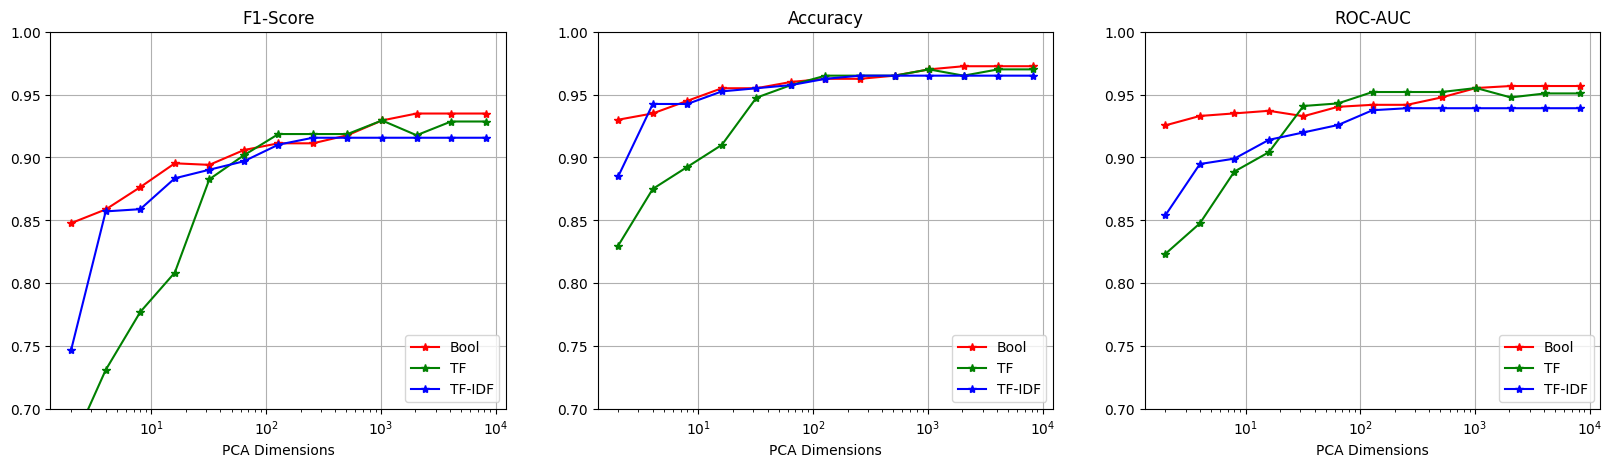

In [ ]:
###########################
# Logitic Classification
###########################

print(dict_scores)

PLOT(lim=None)
# PLOT(lim=[(0.84, 0.95), (0.94, 0.98), (0.92,0.96)])

{'f1_score_bool': [0.8863636363636362, 0.8749999999999999, 0.8247422680412371, 0.872093023255814, 0.8901734104046243, 0.9069767441860465, 0.8915662650602408, 0.8941176470588236, 0.923076923076923, 0.9156626506024096, 0.9112426035502958, 0.9090909090909091, 0.9090909090909091], 'accuracy_score_bool': [0.95, 0.945, 0.915, 0.945, 0.9525, 0.96, 0.955, 0.955, 0.9675, 0.965, 0.9625, 0.9625, 0.9625], 'roc_auc_score_bool': [0.938188608776844, 0.9307189542483659, 0.9245564892623716, 0.9221288515406163, 0.9354808590102708, 0.9445378151260504, 0.9241830065359476, 0.9327731092436974, 0.949299719887955, 0.9391223155929038, 0.941830065359477, 0.9332399626517274, 0.9332399626517274], 'f1_score_tf': [0.736842105263158, 0.6399999999999999, 0.7037037037037036, 0.5891472868217055, 0.814070351758794, 0.8953488372093024, 0.8813559322033897, 0.8901734104046243, 0.9069767441860465, 0.9005847953216374, 0.8941176470588236, 0.888888888888889, 0.888888888888889], 'accuracy_score_tf': [0.8875, 0.7975, 0.84, 0.735

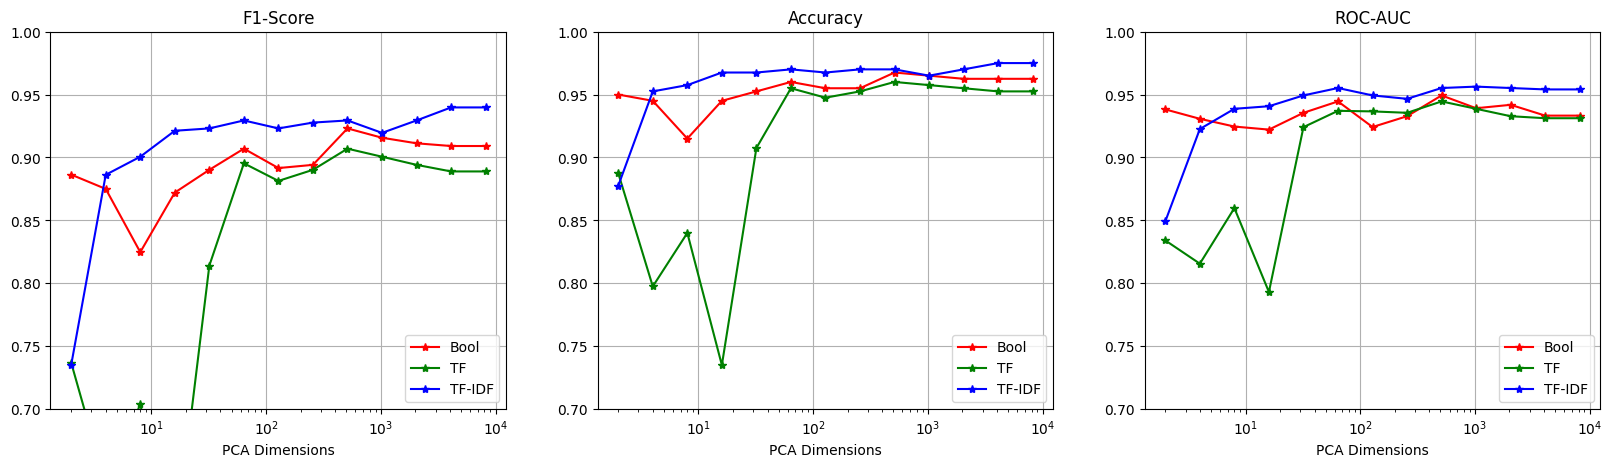

In [ ]:
###########################
# SGD Classification
###########################

print(dict_scores)

PLOT(lim=None)
# PLOT(lim=[(0.84, 0.95), (0.94, 0.98), (0.92,0.96)])

{'f1_score_bool': [0.9036144578313252, 0.8957055214723926, 0.8928571428571428, 0.9047619047619048, 0.874251497005988, 0.9112426035502958, 0.9156626506024096, 0.927710843373494, 0.872093023255814, 0.7959183673469388, 0.7312775330396476, 0.6268656716417911, 0.6268656716417911], 'accuracy_score_bool': [0.96, 0.9575, 0.955, 0.96, 0.9475, 0.9625, 0.965, 0.97, 0.945, 0.9, 0.8475, 0.75, 0.75], 'roc_auc_score_bool': [0.9316526610644257, 0.9214752567693745, 0.9284780578898225, 0.9359477124183007, 0.9151260504201681, 0.941830065359477, 0.9391223155929038, 0.9465919701213819, 0.9221288515406163, 0.9064425770308122, 0.8945845004668534, 0.8369747899159664, 0.8369747899159664], 'f1_score_tf': [0.7870967741935484, 0.8311688311688311, 0.8500000000000001, 0.84472049689441, 0.8679245283018868, 0.8727272727272727, 0.8823529411764706, 0.8914285714285715, 0.8764044943820225, 0.835978835978836, 0.7839195979899497, 0.7715736040609137, 0.7715736040609137], 'accuracy_score_tf': [0.9175, 0.935, 0.94, 0.9375, 0.

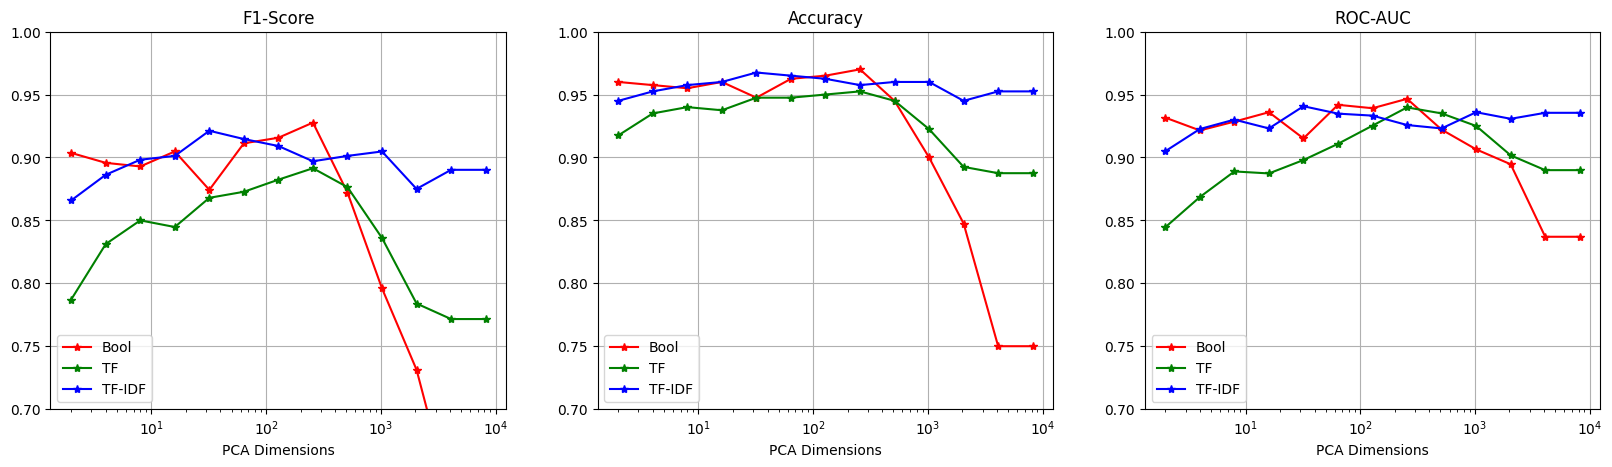

In [ ]:
###########################
# 3-KNN
###########################

print(dict_scores)

PLOT(lim=None, loc=3)
# PLOT(lim=[(0.84, 0.95), (0.94, 0.98), (0.92,0.96)])

{'f1_score_bool': [0.9212121212121211, 0.888888888888889, 0.9101796407185628, 0.9036144578313252, 0.8795180722891566, 0.9166666666666667, 0.9221556886227545, 0.9212121212121211, 0.8764044943820225, 0.780952380952381, 0.6588235294117647, 0.5454545454545454, 0.5454545454545454], 'accuracy_score_bool': [0.9675, 0.955, 0.9625, 0.96, 0.95, 0.965, 0.9675, 0.9675, 0.945, 0.885, 0.7825, 0.65, 0.65], 'roc_auc_score_bool': [0.9407096171802054, 0.915592903828198, 0.9375350140056021, 0.9316526610644257, 0.9167133520074696, 0.9434173669467787, 0.9450046685340803, 0.9407096171802054, 0.9350140056022408, 0.9140989729225024, 0.8576097105508871, 0.7734827264239029, 0.7734827264239029], 'f1_score_tf': [0.8163265306122449, 0.810810810810811, 0.8366013071895425, 0.830188679245283, 0.8679245283018868, 0.8711656441717791, 0.8875739644970414, 0.880952380952381, 0.8555555555555556, 0.7794871794871796, 0.75, 0.7333333333333333, 0.7333333333333333], 'accuracy_score_tf': [0.9325, 0.93, 0.9375, 0.9325, 0.9475, 0.

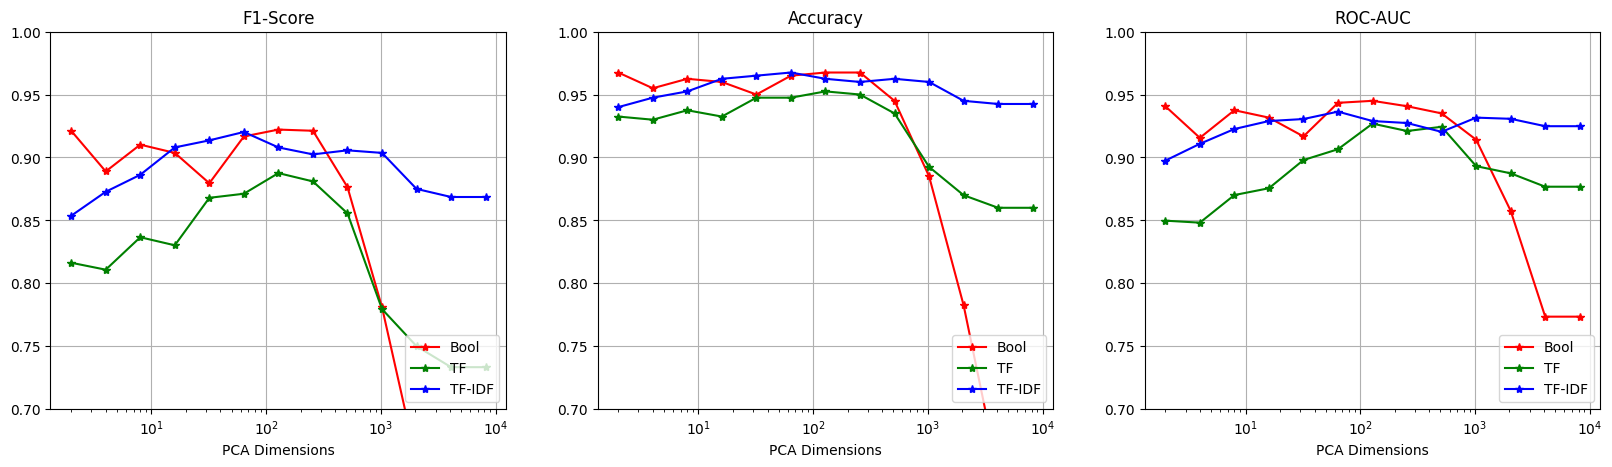

In [ ]:
###########################
# 5-KNN
###########################

print(dict_scores)

PLOT(lim=None)
# PLOT(lim=[(0.84, 0.95), (0.94, 0.98), (0.92,0.96)])

{'f1_score_bool': [0.8999999999999999, 0.8957055214723926, 0.8765432098765432, 0.9012345679012346, 0.8846153846153846, 0.8701298701298701, 0.8456375838926175, 0.8219178082191781, 0.7887323943661971, 0.7801418439716312, 0.7445255474452553, 0.7121212121212122, 0.7121212121212122], 'accuracy_score_bool': [0.96, 0.9575, 0.95, 0.96, 0.955, 0.95, 0.9425, 0.935, 0.925, 0.9225, 0.9125, 0.905, 0.905], 'roc_auc_score_bool': [0.9187675070028012, 0.9214752567693745, 0.9081232492997199, 0.9230625583566762, 0.9027077497665733, 0.8909430438842203, 0.8690009337068161, 0.8513538748832867, 0.8278244631185807, 0.8219421101774043, 0.7984126984126985, 0.7764705882352941, 0.7764705882352941], 'f1_score_tf': [0.8133333333333334, 0.8187919463087248, 0.847682119205298, 0.84, 0.8299319727891156, 0.8533333333333333, 0.84, 0.8055555555555557, 0.7972027972027971, 0.7536231884057971, 0.7259259259259259, 0.36538461538461536, 0.36538461538461536], 'accuracy_score_tf': [0.93, 0.9325, 0.9425, 0.94, 0.9375, 0.945, 0.94,

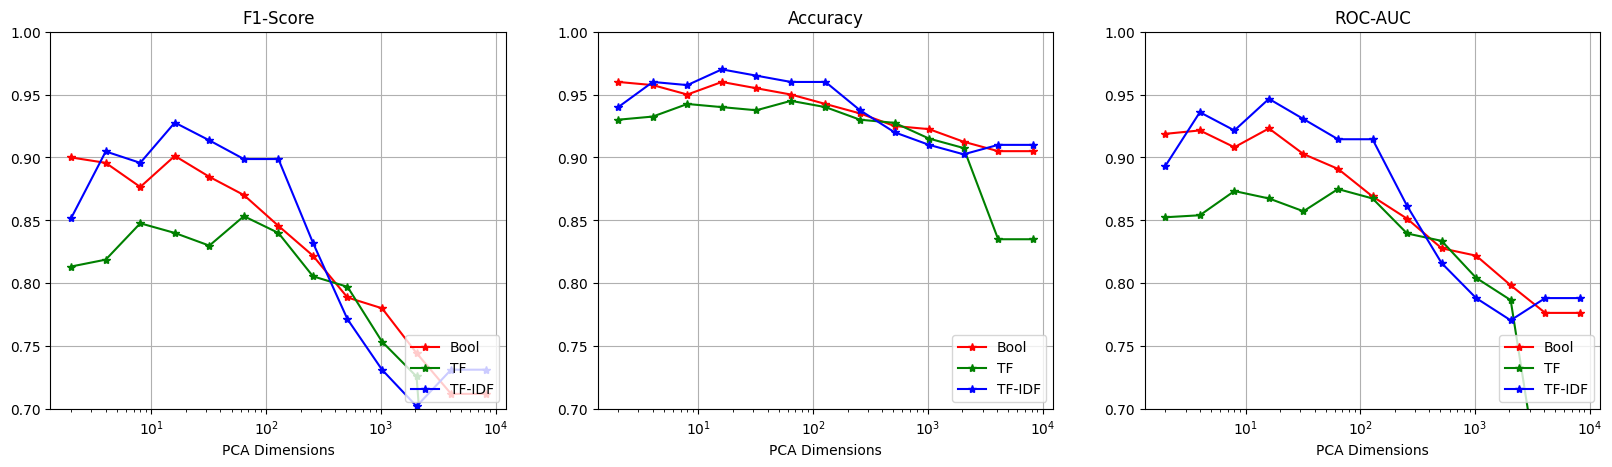

In [ ]:
###########################
# Random Forest
###########################

print(dict_scores)

PLOT(lim=None)
# PLOT(lim=[(0.84, 0.95), (0.94, 0.98), (0.92,0.96)])